# Coursework A: Curve Fitting
## Archie Wilson, Student Number: 22008424
The following notebook aims to investigate how a stochastic gradient descent (SGD) algorithm can be used to fit a polynomial curve of varying orders to a group of data points. Three polynomial models of different order will be trained to fit data following a third-order polynomial to see the effect of SGD over a particular range of $x$ values.

In [ ]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl

# Set figure size
mpl.rcParams['figure.figsize'] = [12.0, 8.0]    # Figure size in inches
mpl.rcParams['figure.dpi']=200    # 200 dots per inch

## Function Definition and Testing

In [ ]:
def polyModel(x,theta):
    """This function calculates the value of y(x) = \sum_i \theta_i x^i for given arrays of x and theta values

    Inputs:    x        array of x values (array)
               theta    array of coefficient values (array)

    Outputs:   y        array of polynomial values y(x) (array)
    """

    # Initialise output array with same shape as x array
    y = np.zeros_like(x)

    # Iterate over theta array to calculate polynomial
    for i,theta_val in enumerate(theta):  # Use enumerate to get the index of the array and the array value itself
        y += theta_val * x**i

    # Return y(x)
    return y

def polyModelWithNoise(x,theta,sigma):
    """This function adds random noise to the polynomial y(x) drawn from the Gaussian distribution with mean 0 and standard deviation sigma

    Inputs:    x            array of x values (array)
               theta        array of coefficient values (array)
               sigma        standard deviation of the noise distribution which is added to the polynomial (float)

    Outputs:   y + noise    array of polynomial values with noise added (array)
    """

    # Calculate polynomial values without noise
    y = polyModel(x,theta)

    # Get random noise values
    noise = np.random.normal(0,sigma,size=x.shape)

    # Return polynomial with noise
    return y + noise

In [ ]:
# Create array of 100 linearly spaced x values from 0 to 1
x = np.linspace(0,1,100)

# Define theta and sigma values
theta = np.array([1,3])
sigma = 0.5

# Check shapes of arrays
print("x.shape:",x.shape)
print("theta.shape:",theta.shape)

x.shape: (100,)
theta.shape: (2,)


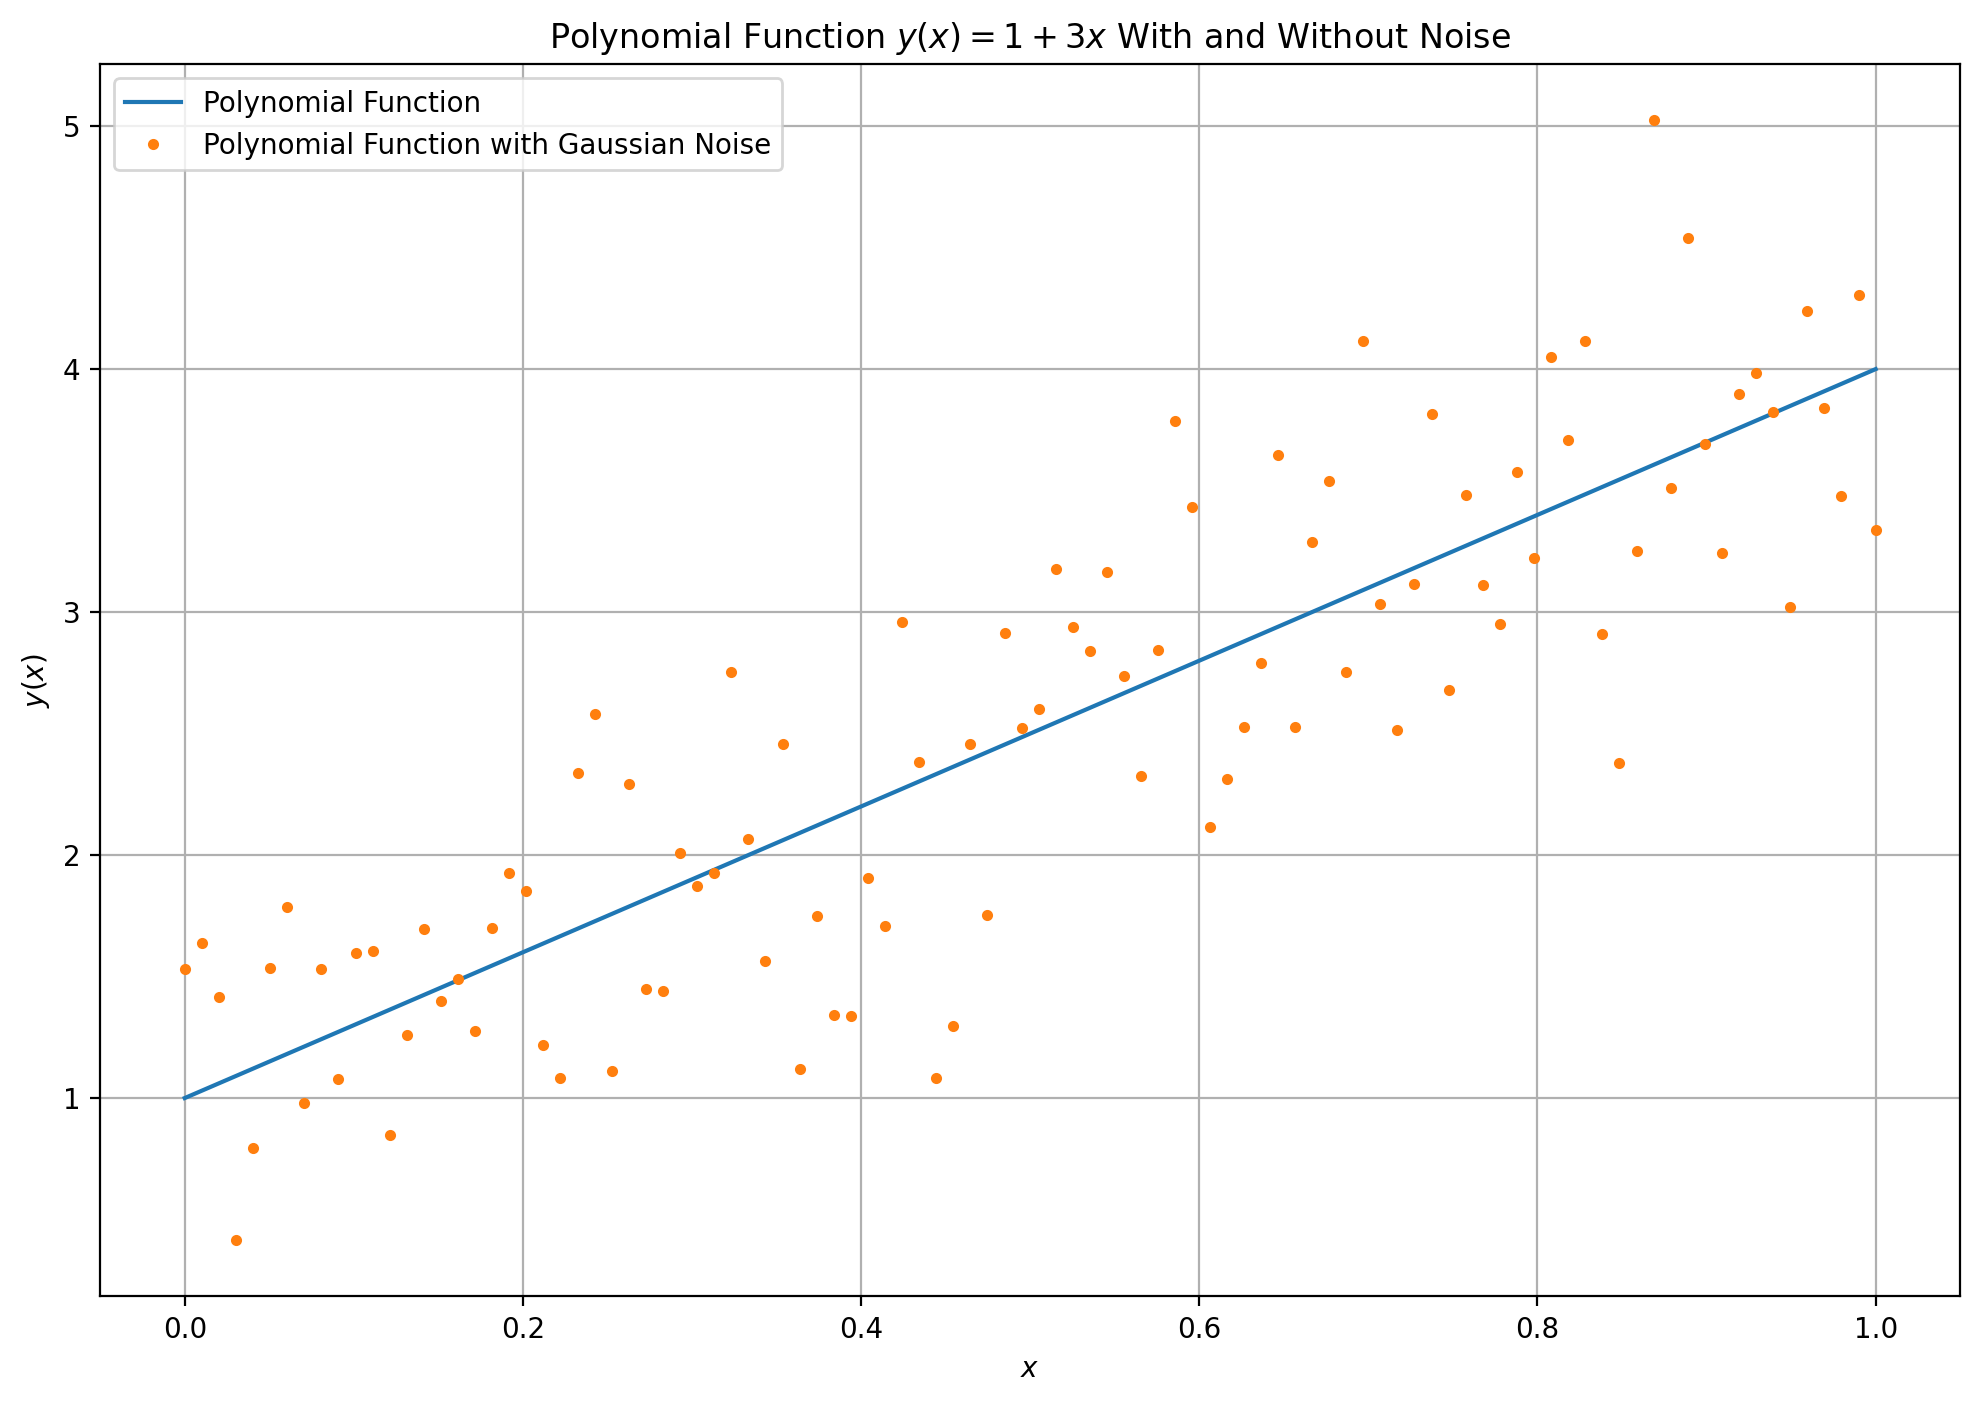

In [ ]:
# Plot polynomial function with and without noise
fig, ax = plt.subplots()
ax.plot(x,polyModel(x,theta),label='Polynomial Function') # Plot normal polynomial as a continuous function
ax.plot(x,polyModelWithNoise(x,theta,sigma),'.',
        label='Polynomial Function with Gaussian Noise') # Plot polynomial with noise as individual data points
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y(x)$')
ax.set_title(r'Polynomial Function $y(x) = 1 + 3x$ With and Without Noise')
ax.grid()
ax.legend()

## Gradient Descent

In [ ]:
def polyGradient(x,theta):
    """This function calculates the gradient of the polynomial with respect to theta

    Inputs:    x         array of x values (array)
               theta     array of coefficient values (array)

    Outputs:   grad_y    2D array of partial derivatives where each row gives the partial derivative with respect
                         to a theta_i for each x value
    """

    # Initialise gradient array
    grad_y = np.zeros((len(x),len(theta)))

    # Iterate to find the gradient for each theta value
    for i in range(len(theta)):
        grad_y[:,i] = x**i    # The derivative with respect to each (ith) theta value for all x values is just x^i

    # Return gradient of the polynomial
    return grad_y

def stochasticGradientDescent(nSteps,x_num,eta,theta_truth,theta_start,sigma):
    """This function implements a stochastic gradient descent algorithm that is iterated over nSteps times

    Inputs:    nSteps         number of iterations for the loop (int)
               x_num          number of random x values to be generated from a uniform distribution between 0 and 1 (int)
               eta            learning rate (float)
               theta_truth    true coefficients of the polynomial (array)
               theta_start    starting array of theta values (array)
               sigma          standard deviation of the noise distribution which is added to the polynomial (float)

    Outputs:   mse_array      1D array of updated mean squared error values after each iteration of the stochastic gradient descent algorithm
    """

    # Initialise mean squared error array
    mse_array = np.zeros(nSteps)

    # Iterate through the stochastic gradient descent algorithm nSteps times
    for i in range(nSteps):
        rand_x = np.random.uniform(0,1,x_num)    # Generate x_num random uniformly distributed x values between 0 and 1
        true_y = polyModelWithNoise(rand_x,theta_truth,sigma)    # Calculate x_num randomly generated y values from rand_x and theta_truth
        y = polyModel(rand_x,theta_start)    # Calculate current polynomial model
        deviation = y-true_y    # Calculate difference from the true polynomial
        mse = np.average((deviation)**2)    # Calculate the mean squared error
        mse_array[i] = mse    # Add mean squared error value to array
        theta_start -= eta*np.average(deviation[:,None]*polyGradient(rand_x,theta_start),axis=0)    # Update theta values using SGD

    # Return mean squared error array
    return mse_array, theta_start

In [ ]:
# Define parameters
nSteps = 100    # Number of iterations or looping steps
x_num = 10    # Number of random x values
eta = 0.5    # Learning rate
theta_truth = np.array([1,4])    # True theta values
theta_start = np.array([-1,0.5])    # Starting theta values

# Run the stochastic gradient descent algorithm
mse_array, theta_final = stochasticGradientDescent(nSteps,x_num,eta,theta_truth,theta_start,sigma)

## Results Plotting and Higher Order Polynomials

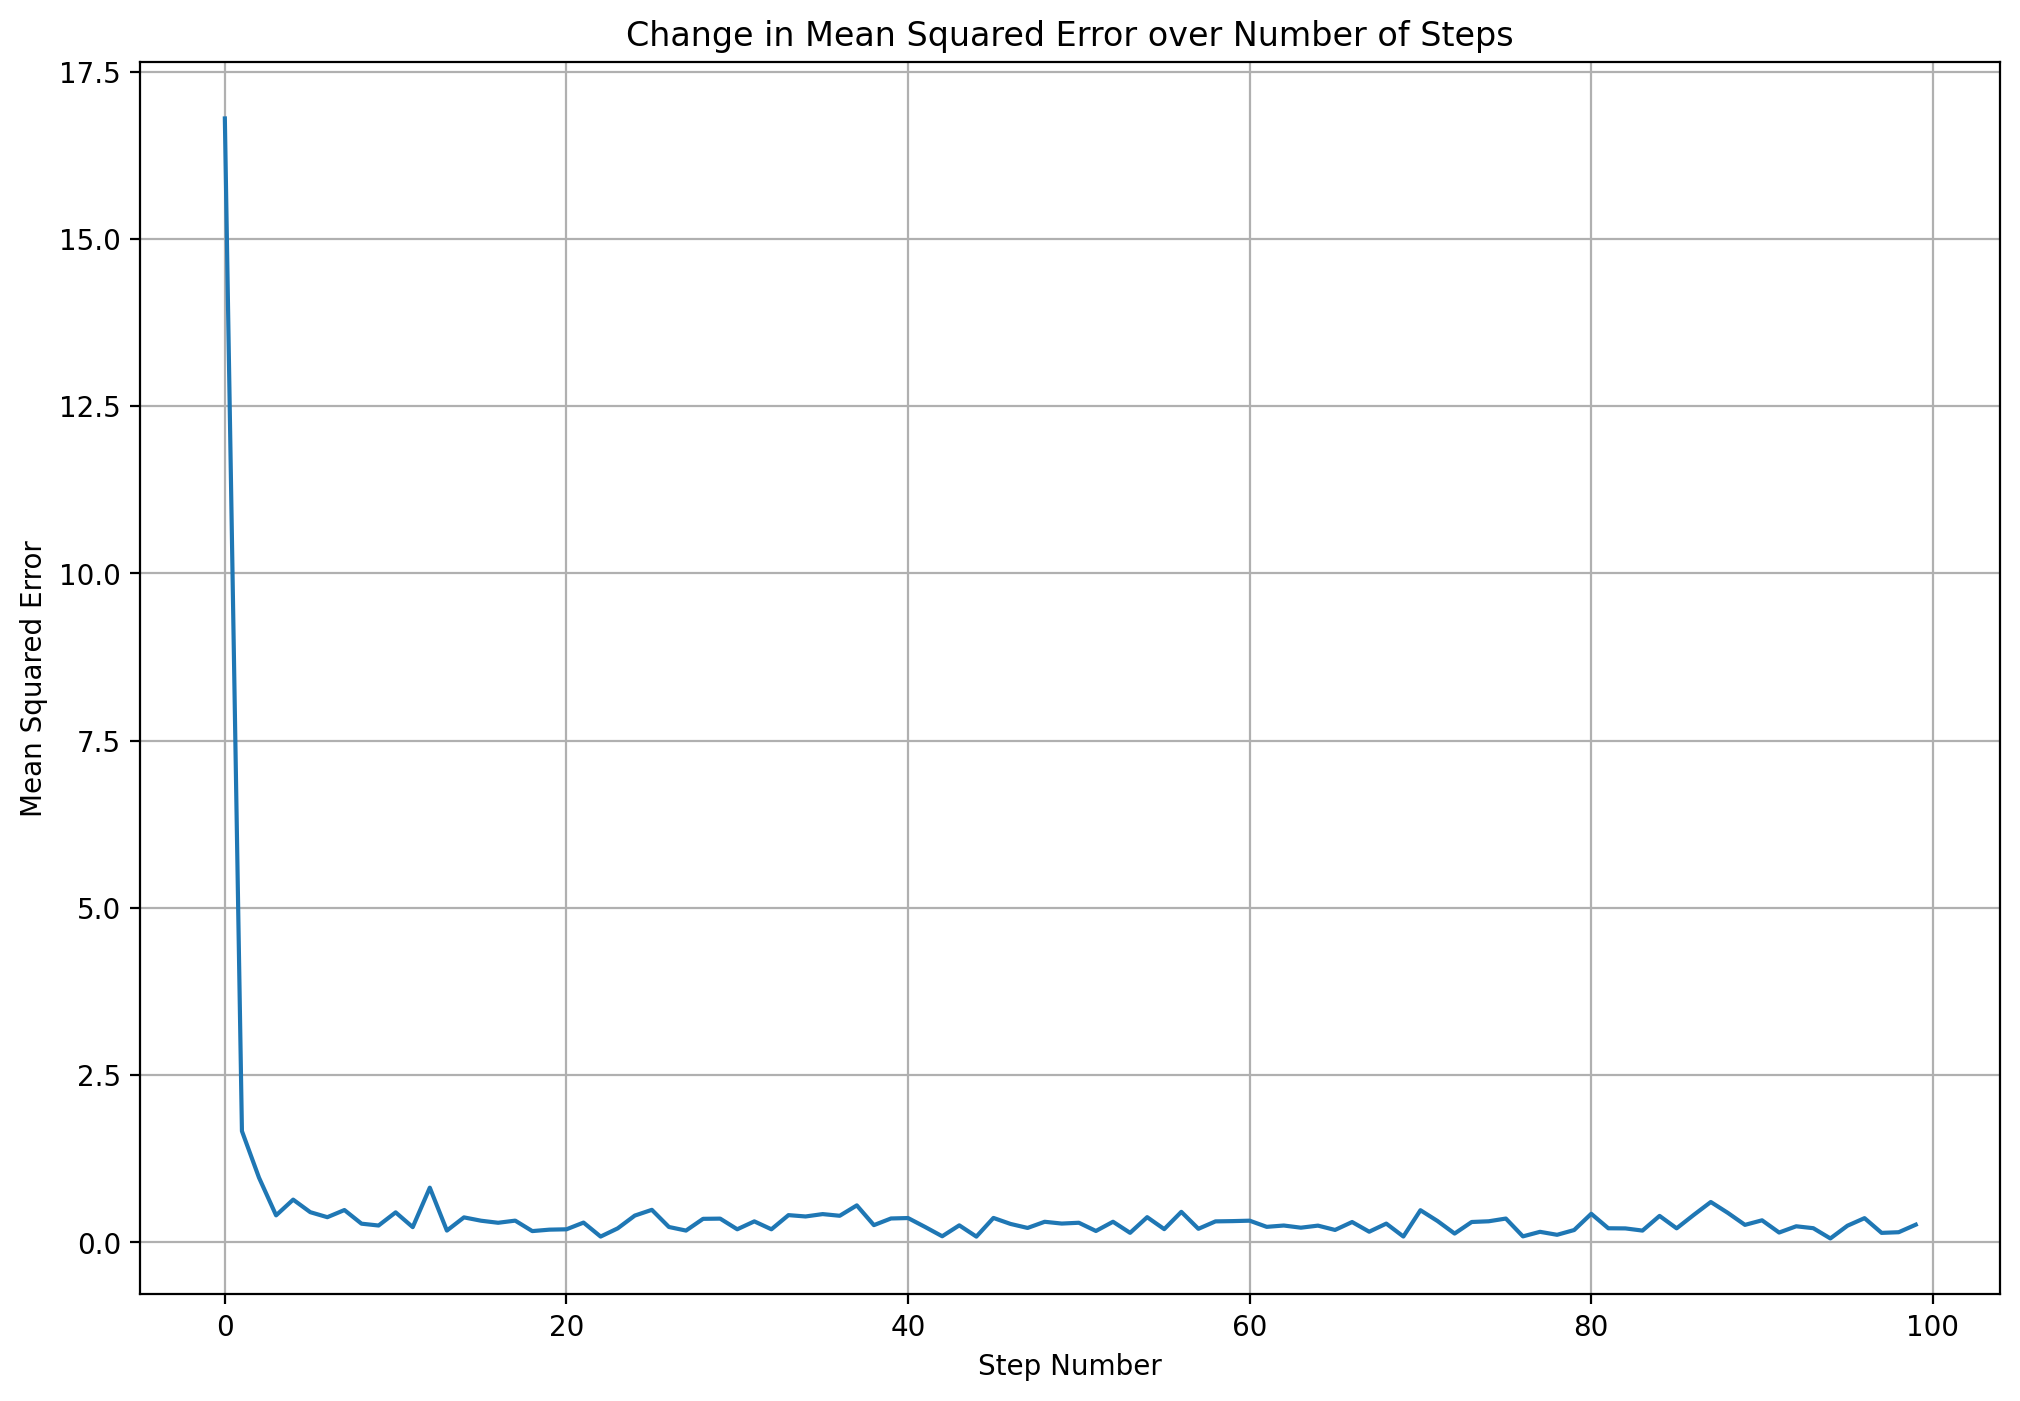

In [ ]:
# Plot mean squared error against number of steps
fig, ax = plt.subplots()
count = np.arange(nSteps+1)    # Creates an array of integers from 0 to nSteps
ax.plot(count[:-1],mse_array) # Plot all but last step number so that the two array dimensions are the same
ax.set_xlabel('Step Number')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Change in Mean Squared Error over Number of Steps')
ax.grid()

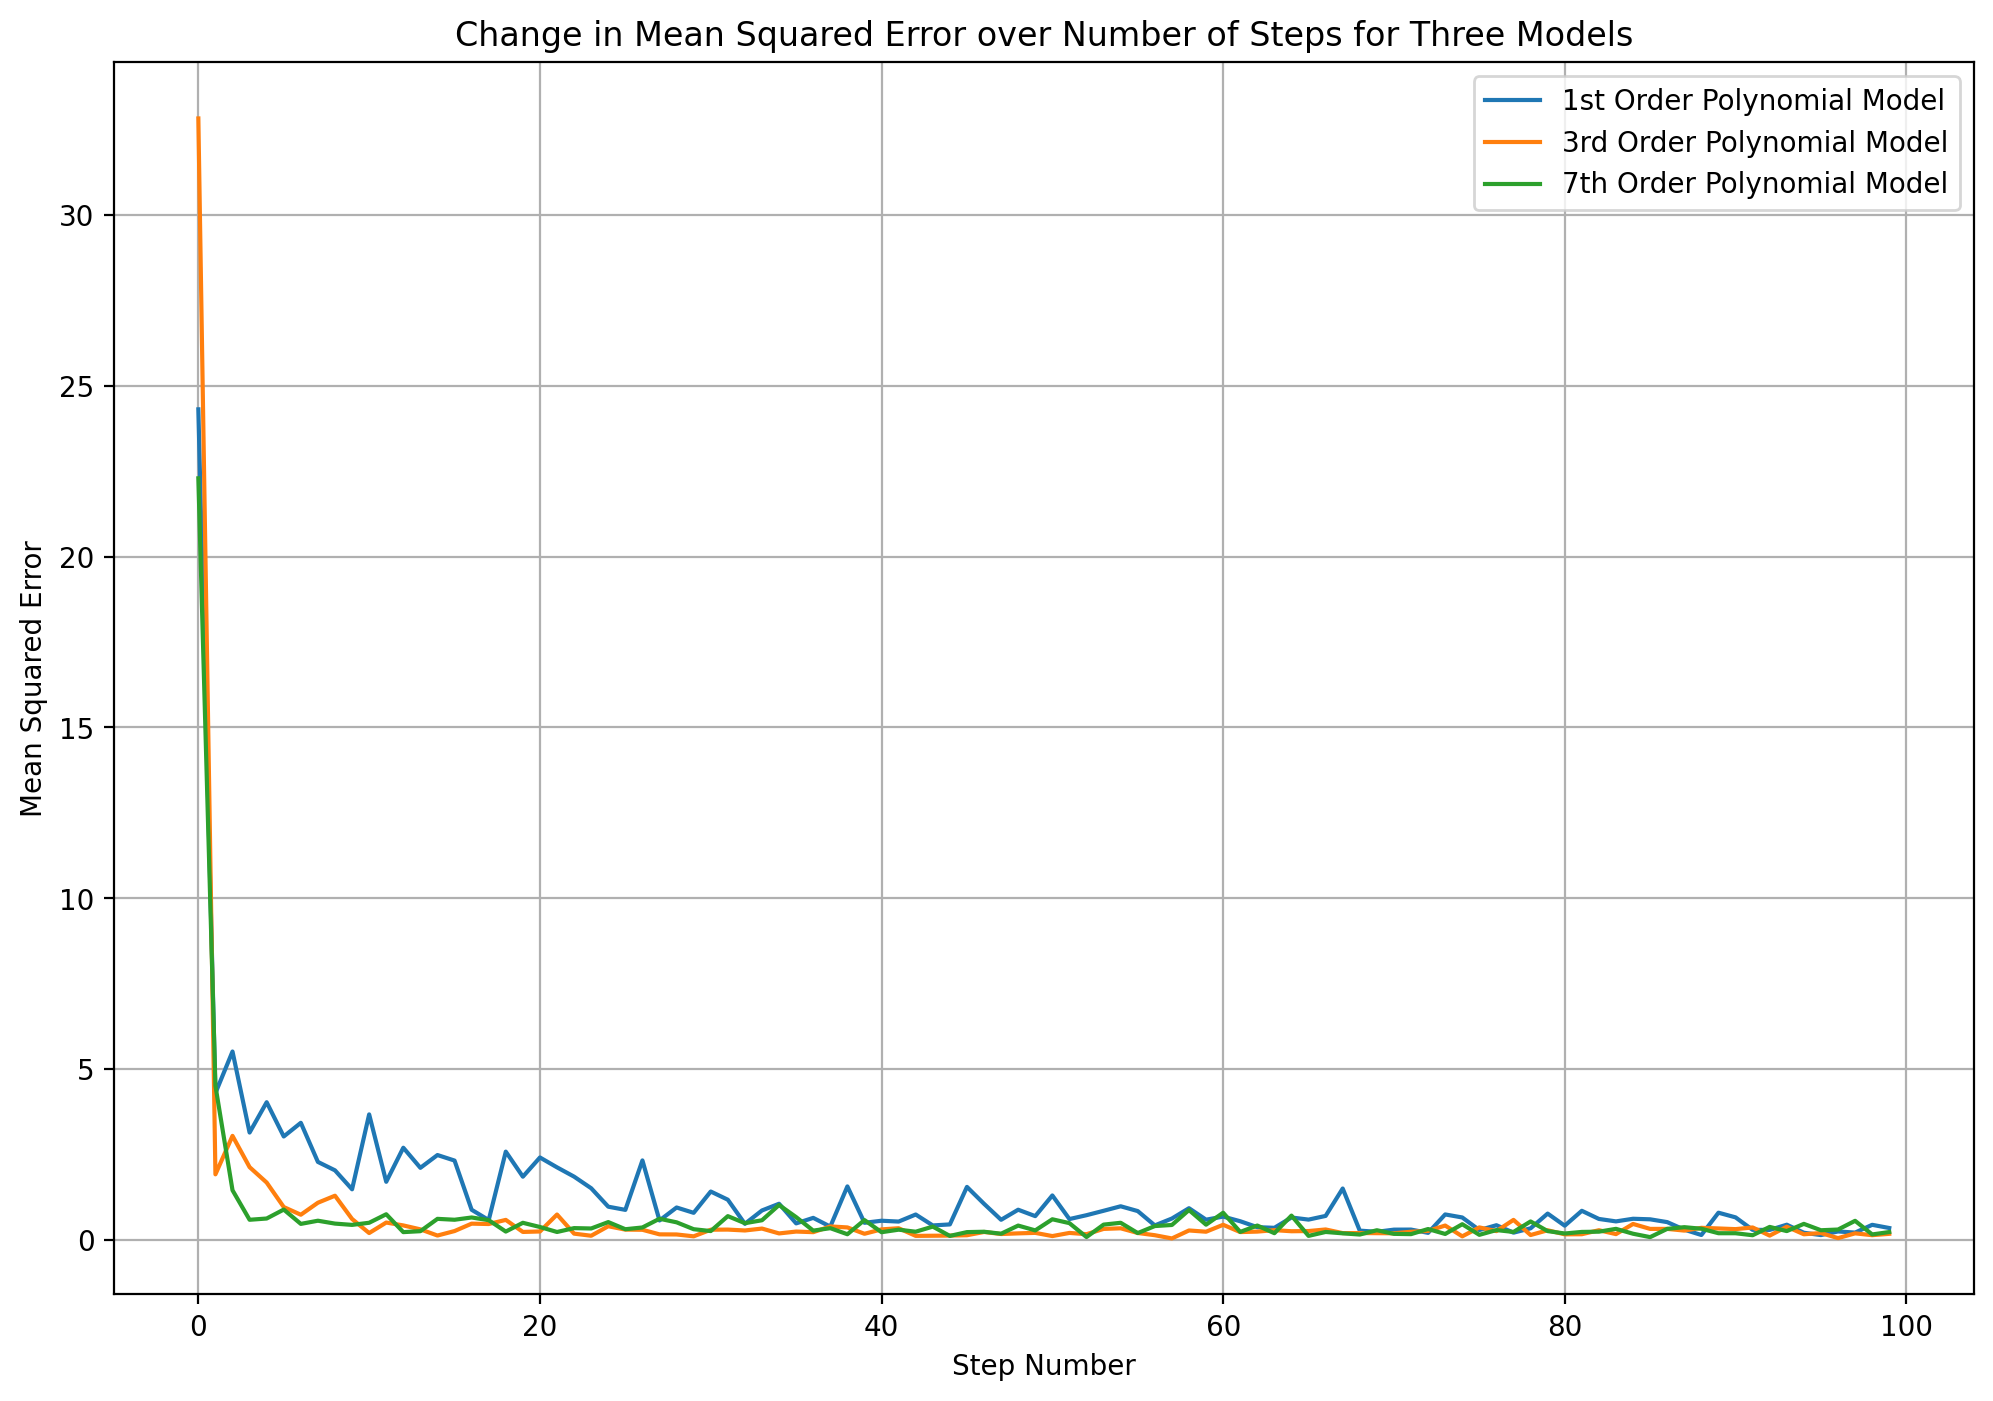

In [ ]:
# Define new true theta values and initialise starting theta arrays of varying orders
theta_truth_3rd = np.array([1,4,3,2])
theta_start_1st = np.zeros(2)    # First order
theta_start_3rd = np.zeros(4)    # Third order
theta_start_7th = np.zeros(8)    # Seventh order

# Implement the stochastic gradient descent algorithm for the three models
mse_1st, theta_final_1st = stochasticGradientDescent(nSteps,x_num,eta,theta_truth_3rd,theta_start_1st,sigma)
mse_3rd, theta_final_3rd = stochasticGradientDescent(nSteps,x_num,eta,theta_truth_3rd,theta_start_3rd,sigma)
mse_7th, theta_final_7th = stochasticGradientDescent(nSteps,x_num,eta,theta_truth_3rd,theta_start_7th,sigma)

# Plot mean squared error against number of steps for the three models
fig, ax = plt.subplots()
count = np.arange(nSteps+1)    # Creates an array of integers from 0 to nSteps
ax.plot(count[:-1],mse_1st,label='1st Order Polynomial Model') # Plot all but last step number so that the two array dimensions are the same
ax.plot(count[:-1],mse_3rd,label='3rd Order Polynomial Model')
ax.plot(count[:-1],mse_7th,label='7th Order Polynomial Model')
ax.set_xlabel('Step Number')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Change in Mean Squared Error over Number of Steps for Three Models')
ax.grid()
ax.legend()

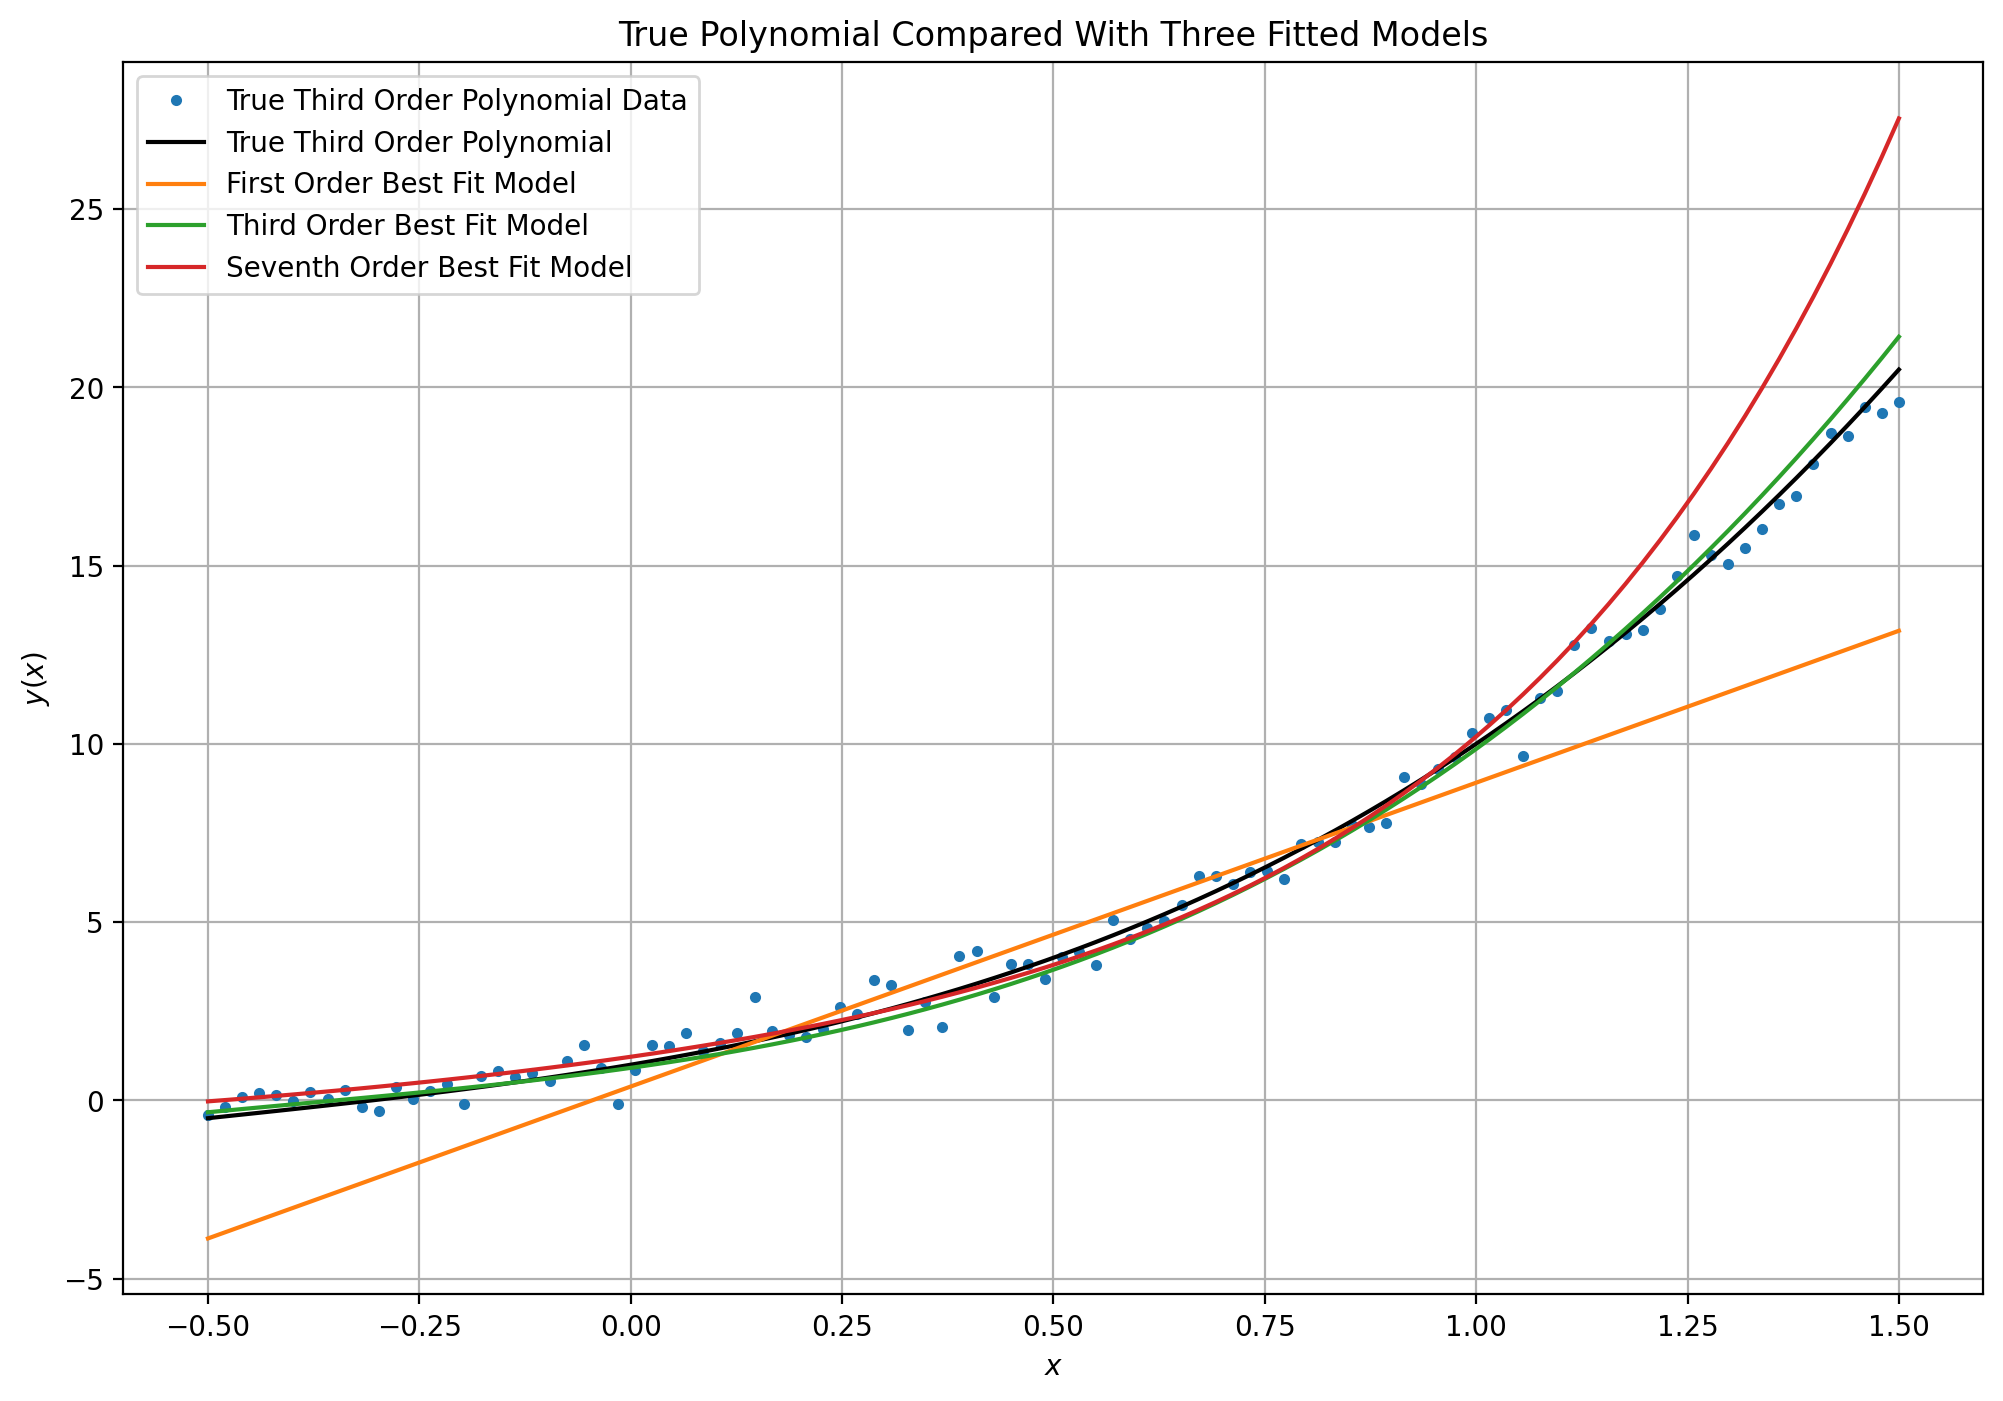

In [ ]:
# Create an expanded x range and generate the true data points
x_expanded = np.linspace(-0.5,1.5,100)
y_true = polyModelWithNoise(x_expanded,theta_truth_3rd,sigma)

# Plot three trained models and data set
fig, ax = plt.subplots()
ax.plot(x_expanded,y_true,'.',label='True Third Order Polynomial Data')
ax.plot(x_expanded,polyModel(x_expanded,theta_truth_3rd),label='True Third Order Polynomial',color='black')
ax.plot(x_expanded,polyModel(x_expanded,theta_final_1st),label='First Order Best Fit Model')
ax.plot(x_expanded,polyModel(x_expanded,theta_final_3rd),label='Third Order Best Fit Model')
ax.plot(x_expanded,polyModel(x_expanded,theta_final_7th),label='Seventh Order Best Fit Model')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y(x)$')
ax.set_title('True Polynomial Compared With Three Fitted Models')
ax.grid()
ax.legend()

Although all three models pass through the data points, the first-order polynomial doesn't fit the data as strongly as the third-order and seventh-order polynomials, even in the training range of $0 \leq x \leq 1$. Outside this range, the first-order polynomial doesn't follow the trajectory of the data points as the model is too simplistic and cannot account for the curvature in the data. This model is underfitting the data. The third and seventh-order polynomials fit the data well in the trained range, however, beyond this, the seventh-order polynomial begins to diverge from the data points, especially in the region $x > 1$. The seventh-order model has overfit the data in the training range due to its higher number of parameters. Unsurprisingly, the third-order model fits the data set the best both inside and outside the training range, although there is a slight divergence in the region $x > 1$. This could be fixed by either increasing the number of steps in the stochastic gradient descent algorithm or increasing the training range.